# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "PetersenEtAl2011"
sys.path.append(str(MODEL_DIR))

import run_average_displacement

# View the docstrings

In [3]:
help(run_average_displacement)

Help on module run_average_displacement:

NAME
    run_average_displacement

DESCRIPTION
    This file runs the PEA11 principal fault displacement model to calculate the average
    displacement that is implied by the model prediction.
    - Any number of scenarios are allowed (e.g., user can enter multiple magnitudes).
    - The model-implied Average Displacement is calculated as the area under the mean slip profile.
    - The results are returned in a pandas DataFrame.
    - Only the principal fault displacement models for direct (i.e., not normalized) predictions are
    implemented herein currently.
    - Command-line use is supported; try `python run_average_displacement.py --help`
    - Module use is supported; try `from run_average_displacement import run_ad`
    
    # NOTE: This script just calls `run_displacement_profile.py` which in turn calls `run_displacement_model.py`
    
    Reference: https://doi.org/10.1785/0120100035

FUNCTIONS
    main()
    
    run_ad(*, magnitude

# Run Average Displacement

## Single scenarios

A single scenario is defined as a magnitude/style. Here is an example (note all parameters must be passed as keyword arguments).

In [4]:
df = run_average_displacement.run_ad(magnitude=7)
df

,magnitude,model_name,style,avg_displ
0,7.0,elliptical,strike-slip,1.183029


The Petersen et al. (2011) model provides three alternative submodels for different profile shapes. The default is the elliptical model, but the user can choose other options, such as `submodel="quadratic"`:

In [5]:
df = run_average_displacement.run_ad(magnitude=7, submodel="quadratic")
df

,magnitude,model_name,style,avg_displ
0,7.0,quadratic,strike-slip,1.173158


This model should only be used for strike-slip faulting. That is the default style. A `UserWarning` will be issued and the user input will be over-ridden in the output table if another style is entered, such as `style="reverse"`:

In [6]:
df = run_average_displacement.run_ad(magnitude=7, submodel="quadratic", style="reverse")
df

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\PetersenEtAl2011\run_displacement_model.py:158: UserWarning: This model is only recommended for strike-slip faulting, but 'reverse' was entered.User input will be over-ridden.
  warnings.warn(


,magnitude,model_name,style,avg_displ
0,7.0,quadratic,strike-slip,1.173158


## Multiple scenarios

Multiple magnitude/submodel scenarios can be run. All combinations of magnitudes and submodels are run. Here is an example.

In [7]:
df = run_average_displacement.run_ad(
    magnitude=[6.5, 7, 7.5], submodel=["elliptical", "quadratic"]
)
df

,magnitude,model_name,style,avg_displ
0,6.5,elliptical,strike-slip,0.482742
1,6.5,quadratic,strike-slip,0.479481
2,7.0,elliptical,strike-slip,1.183029
3,7.0,quadratic,strike-slip,1.173158
4,7.5,elliptical,strike-slip,2.899180
5,7.5,quadratic,strike-slip,2.870394


## Create magnitude scaling plots

In [8]:
magnitudes = np.arange(5, 8.6, 0.1)
models = ["elliptical", "quadratic", "bilinear"]

results = run_average_displacement.run_ad(magnitude=magnitudes, submodel=models)
results.head()

,magnitude,model_name,style,avg_displ
0,5.0,bilinear,strike-slip,0.031562
1,5.0,elliptical,strike-slip,0.032800
2,5.0,quadratic,strike-slip,0.032735
3,5.1,bilinear,strike-slip,0.037705
4,5.1,elliptical,strike-slip,0.039240


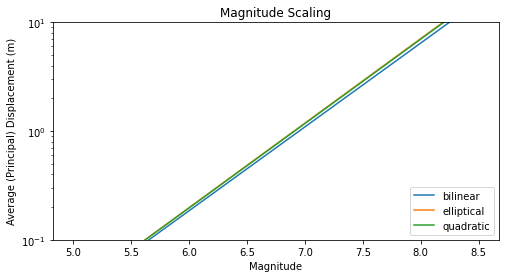

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for model, group in results.groupby(["model_name"]):
    group = group.sort_values(by="magnitude")
    ax.semilogy(group["magnitude"], group["avg_displ"], label=model)

ax.set(
    xlabel="Magnitude",
    ylabel="Average (Principal) Displacement (m)",
    title="Magnitude Scaling",
)
ax.set_ylim([0.1, 10])
ax.legend(loc="lower right");